In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

#reads in base csv data, adds column names and sets appreiate datatypes
df = pd.read_csv (r'.\Myoware Testing Data\2 Sensor Test data\Wrist Flexed inward\Kaylee\Test 3\Test 3.csv')
comp = pd.df = pd.read_csv (r'.\Myoware Testing Data\2 Sensor Test data\Tripod\Kaylee\Test 2\Test 2.csv')

In [3]:
df.columns = ['Time', 'myoware1', 'myoware2']
df = df.astype({'Time':'int', 'myoware1':'float', 'myoware2':'float'})           
df.head()

,Time,myoware1,myoware2
0,556922,0.17,0.08
1,557460,0.15,0.08
2,558001,0.16,0.08
3,558538,0.16,0.07
4,559079,0.15,0.08


In [4]:
comp.columns = ['Time', 'myoware1', 'myoware2']
comp = comp.astype({'Time':'int', 'myoware1':'float', 'myoware2':'float'})           
comp.head()

,Time,myoware1,myoware2
0,563653,0.26,0.17
1,564191,0.26,0.17
2,564731,0.26,0.18
3,565268,0.26,0.18
4,565809,0.26,0.19


In [5]:
#retreives starting reference time to normalize time data readings
baseTime1 = df.iat[0,0]
df["Time"] = df["Time"] - baseTime1
df.head()

,Time,myoware1,myoware2
0,0,0.17,0.08
1,538,0.15,0.08
2,1079,0.16,0.08
3,1616,0.16,0.07
4,2157,0.15,0.08


In [6]:
baseTime2 = comp.iat[0,0]
comp["Time"] = comp["Time"] - baseTime2
comp.head()

,Time,myoware1,myoware2
0,0,0.26,0.17
1,538,0.26,0.17
2,1078,0.26,0.18
3,1615,0.26,0.18
4,2156,0.26,0.19


<IPython.core.display.Javascript object>


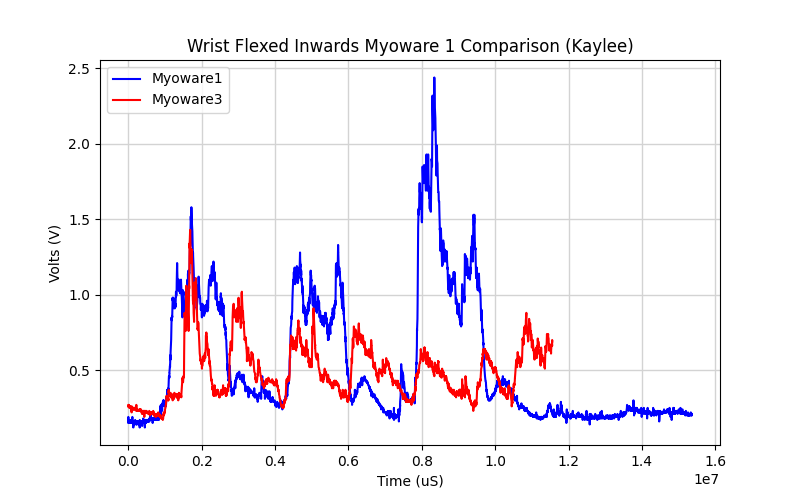

<IPython.core.display.Javascript object>


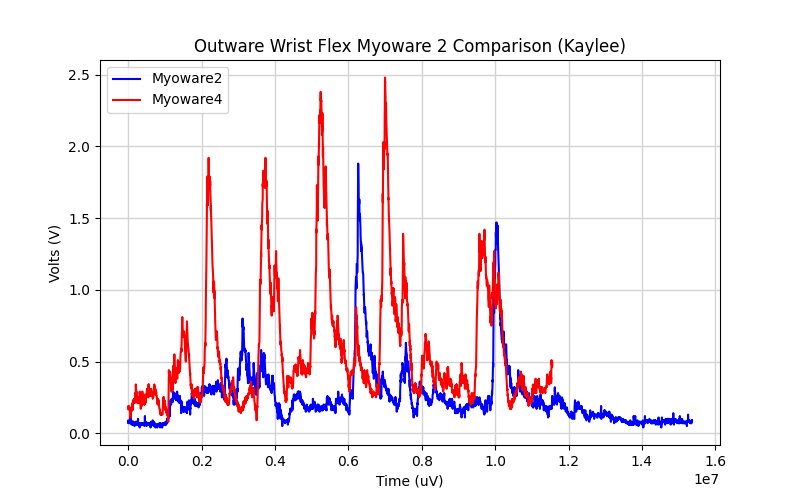

In [7]:
#reads in dataframe values then create base graph
Time1 = np.array(df['Time'])
myoware1 = np.array(df['myoware1'])
myoware2 = np.array(df['myoware2'])

Time2 = np.array(comp['Time'])
myoware3 = np.array(comp['myoware1'])
myoware4 = np.array(comp['myoware2'])

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(Time1, myoware1, color ="blue", label="Myoware1")
plt.plot(Time2, myoware3, color ="red", label="Myoware3")

plt.legend(loc="upper left" )
plt.xlabel('Time (uS)')
plt.ylabel("Volts (V)")
plt.title("Wrist Flexed Inwards Myoware 1 Comparison (Kaylee)")
# To show the plot
plt.show()

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(Time1, myoware2, color ="blue", label="Myoware2")
plt.plot(Time2, myoware4, color ="red", label="Myoware4")

plt.legend(loc="upper left" )
plt.xlabel('Time (uV)')
plt.ylabel("Volts (V)")
plt.title("Outware Wrist Flex Myoware 2 Comparison (Kaylee)")
# To show the plot
plt.show()

<IPython.core.display.Javascript object>


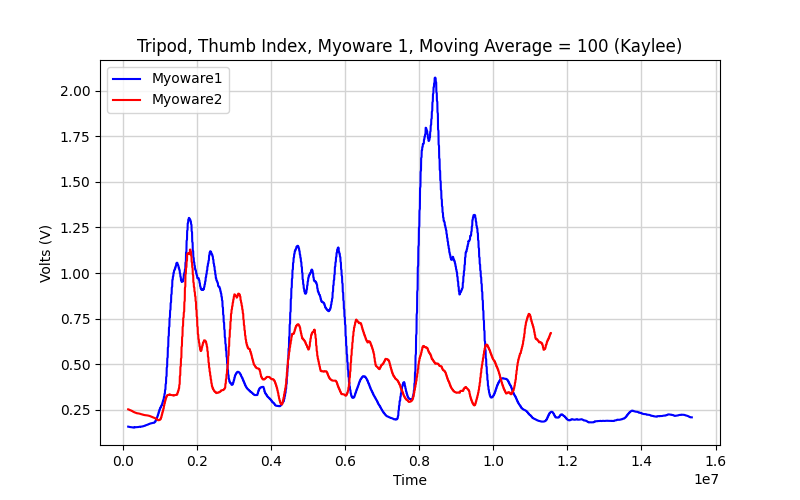

<IPython.core.display.Javascript object>


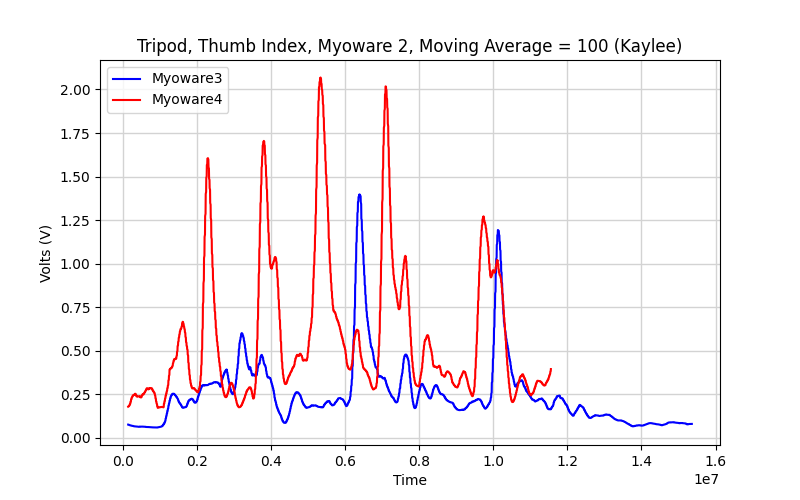

In [8]:
#Moving average
avg = 100

avgMyoware1 = np.array(df["myoware1"].rolling(avg).mean())
avgMyoware2 = np.array(df["myoware2"].rolling(avg).mean())

avgMyoware3 = np.array(comp["myoware1"].rolling(avg).mean())
avgMyoware4 = np.array(comp["myoware2"].rolling(avg).mean())

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(Time1, avgMyoware1, color ="blue", label="Myoware1")
plt.plot(Time2, avgMyoware3, color ="red", label="Myoware2")
plt.legend(loc="upper left")
plt.xlabel('Time')
plt.ylabel("Volts (V)")
plt.title("Tripod, Thumb Index, Myoware 1, Moving Average = 100 (Kaylee)")
plt.show()

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(Time1, avgMyoware2, color ="blue", label="Myoware3")
plt.plot(Time2, avgMyoware4, color ="red", label="Myoware4")
plt.legend(loc="upper left")
plt.xlabel('Time')
plt.ylabel("Volts (V)")
plt.title("Tripod, Thumb Index, Myoware 2, Moving Average = 100 (Kaylee)")
plt.show()

<IPython.core.display.Javascript object>


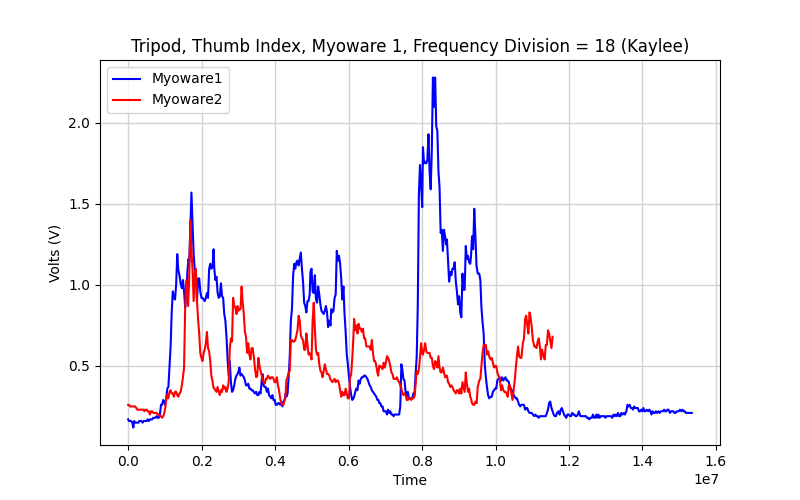

<IPython.core.display.Javascript object>


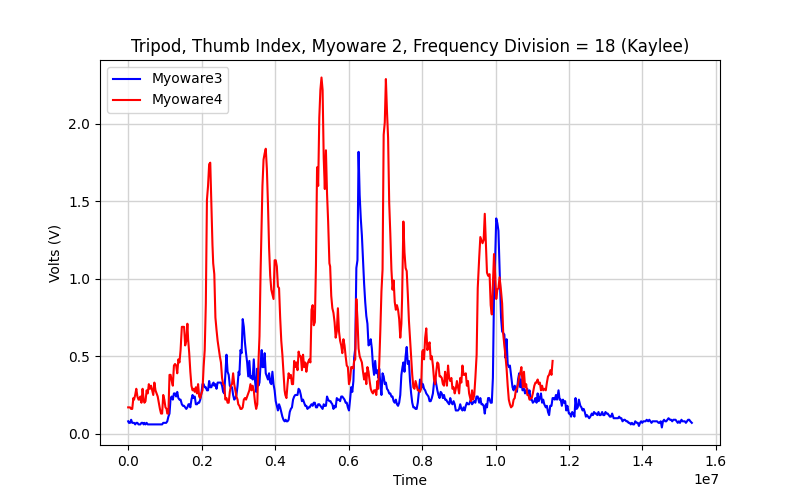

In [9]:
#Frequency division Number represents the devision taking place 5 = every 5th row or freq/5
freq1 = df.iloc[::18, :]
freq1.head()

freq2 = comp.iloc[::18, :]
freq2.head()

freqTime1 = np.array(freq1['Time'])
freqMyoware1 = np.array(freq1['myoware1'])
freqMyoware2 = np.array(freq1['myoware2'])

freqTime2 = np.array(freq2['Time'])
freqMyoware3 = np.array(freq2['myoware1'])
freqMyoware4 = np.array(freq2['myoware2'])

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(freqTime1, freqMyoware1, color ="blue", label="Myoware1")
plt.plot(freqTime2, freqMyoware3, color ="red", label="Myoware2")
plt.legend(loc="upper left")
plt.xlabel('Time')
plt.ylabel("Volts (V)")
plt.title("Tripod, Thumb Index, Myoware 1, Frequency Division = 18 (Kaylee)")
plt.show()

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(freqTime1, freqMyoware2, color ="blue", label="Myoware3")
plt.plot(freqTime2, freqMyoware4, color ="red", label="Myoware4")
plt.legend(loc="upper left")
plt.xlabel('Time')
plt.ylabel("Volts (V)")
plt.title("Tripod, Thumb Index, Myoware 2, Frequency Division = 18 (Kaylee)")
plt.show()

<IPython.core.display.Javascript object>


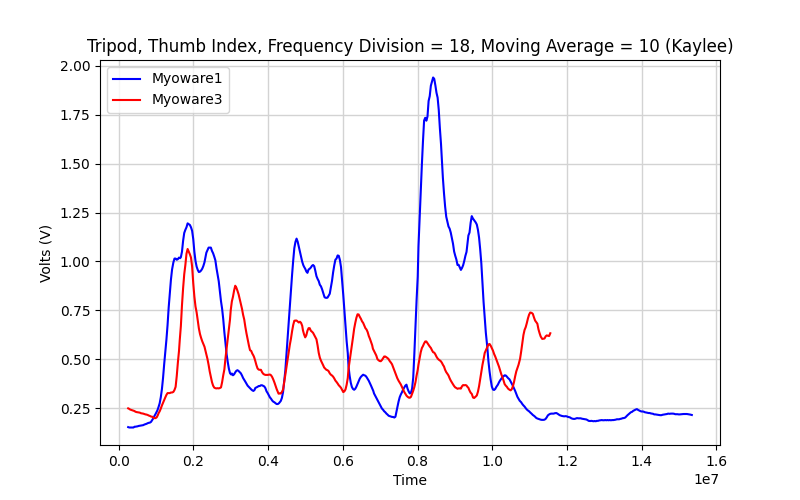

<IPython.core.display.Javascript object>


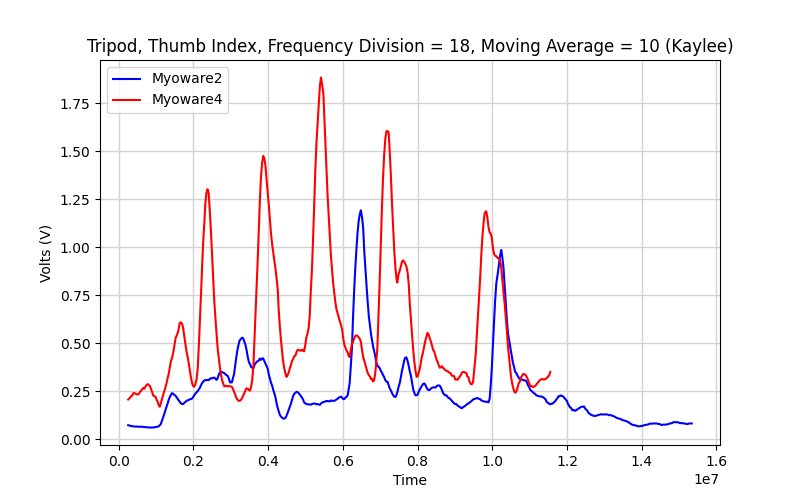

In [10]:
#Moving average of frequency division
freqAvg = 10

avgFreqMyoware1 = np.array(freq1["myoware1"].rolling(freqAvg).mean())
avgFreqMyoware2 = np.array(freq1["myoware2"].rolling(freqAvg).mean())

avgFreqMyoware3 = np.array(freq2["myoware1"].rolling(freqAvg).mean())
avgFreqMyoware4 = np.array(freq2["myoware2"].rolling(freqAvg).mean())
plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(freqTime1, avgFreqMyoware1, color ="blue", label="Myoware1")
plt.plot(freqTime2, avgFreqMyoware3, color ="red", label="Myoware3")
plt.legend(loc="upper left")
plt.xlabel('Time')
plt.ylabel("Volts (V)")
plt.title("Tripod, Thumb Index, Frequency Division = 18, Moving Average = 10 (Kaylee)")
plt.show()

plt.figure(figsize=(8,5))
plt.grid(color='lightgrey', linestyle='-', linewidth=1)

plt.plot(freqTime1, avgFreqMyoware2, color ="blue", label="Myoware2")
plt.plot(freqTime2, avgFreqMyoware4, color ="red", label="Myoware4")
plt.legend(loc="upper left")
plt.xlabel('Time')
plt.ylabel("Volts (V)")
plt.title("Tripod, Thumb Index, Frequency Division = 18, Moving Average = 10 (Kaylee)")
plt.show()